<font color= #1a75ff><h3>Insurance Fraud Detection - Claims </h3></font>

---

>Frauds in Insurance has been around since the inception of Insurance organizations. Different types of insurance are prone to different types of frauds/crimes, however, in most cases, it manifests deliberate damage to the insured person/item for the purpose to obtain claims from insurance provider. Detecting insurance fraud can be difficult since not every claim can be investigated thoroughly. The project has attempted to identify such fraudulent claims with help
of historical data. fraud detection is a knowledge-intensive activity that allows classifying correctly whether the claim is legitimate or fraudulent. The project would help to make it easier for human agents to investigate a fraudulent claim.


---

>https://www.kaggle.com/roshansharma/insurance-claim



<font color= #1a75ff><h3>Data Cleansing & Exploratory Data Analysis</h3></font>

---


In [ ]:
!pip install pandas-profiling==2.7.1

In [52]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
data  = pd.read_csv('insurance_claims.csv')

In [54]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [55]:
nRow, nCol = data.shape
print(f'There are {nRow} and {nCol} columns.')

There are 1000 and 39 columns.


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [57]:
data = data.replace('?',np.NaN)
data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [59]:
data['collision_type'].mode()[0]

'Rear Collision'

In [60]:
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

In [61]:
data['property_damage'].mode()[0]

'NO'

In [62]:
data['property_damage'].fillna('NO', inplace = True)

In [63]:
data['police_report_available'].mode()[0]

'NO'

In [64]:
data['police_report_available'].fillna('NO', inplace = True)

In [ ]:
data.isnull().any().any()

False

In [ ]:
report = ProfileReport(data)

In [ ]:
report.to_file("ProfileReportTest.html")

Summarize dataset:   0%|          | 0/51 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


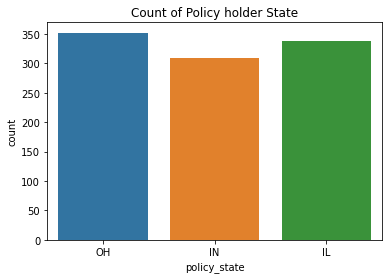

In [ ]:
sns.countplot(x='policy_state', data=data).set_title('Count of Policy holder State')
plt.show()

In [ ]:
data.query('fraud_reported == "Y"')['witnesses'].value_counts()

2    74
1    63
3    60
0    50
Name: witnesses, dtype: int64

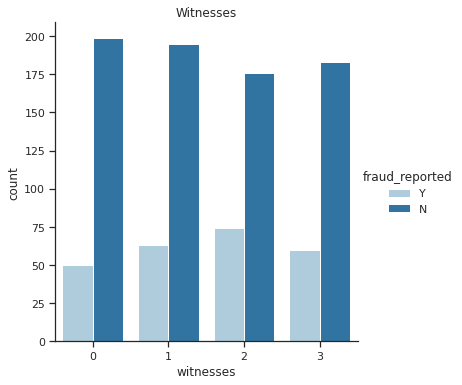

In [69]:
sns.set_style("ticks")
wit = sns.catplot(x='witnesses',kind="count",hue= 'fraud_reported',palette = sns.color_palette("Paired", 2), data=data)
plt.title('Witnesses')
plt.show()

In [ ]:
print(data['insured_sex'].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


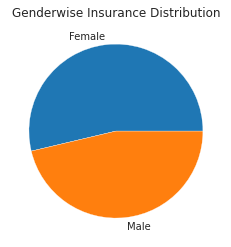

In [ ]:
%matplotlib inline
sex = ['Female','Male']
plt.pie(data['insured_sex'].value_counts(),labels = sex)
plt.title('Genderwise Insurance Distribution')
plt.show()

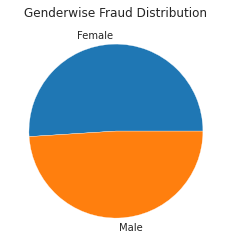

In [ ]:
%matplotlib inline
sex = ['Female','Male']
plt.pie(data.query('fraud_reported == "Y"')['insured_sex'].value_counts(),labels = sex)
plt.title('Genderwise Fraud Distribution')
plt.show()

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


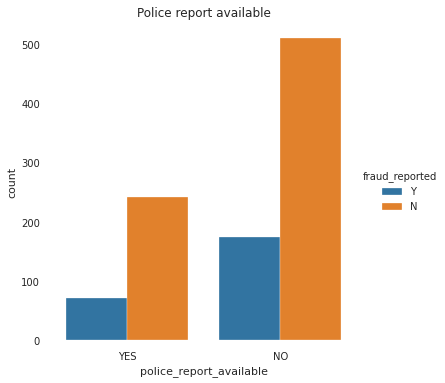

In [ ]:
sns.catplot(x='police_report_available',kind="count",hue= 'fraud_reported', data=data)
plt.title("Police report available")
plt.show()

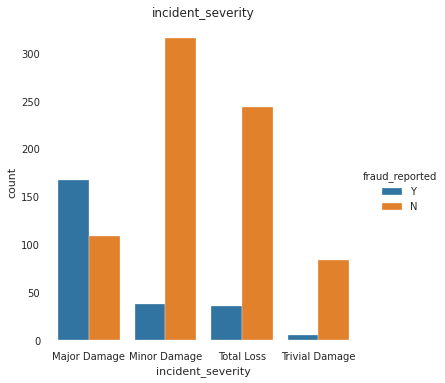

In [ ]:
sns.catplot(x='incident_severity',kind="count",hue= 'fraud_reported', data=data)
plt.title('incident_severity')
plt.show()

In [ ]:
education = data['insured_education_level'].value_counts()

In [ ]:
print(education)

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


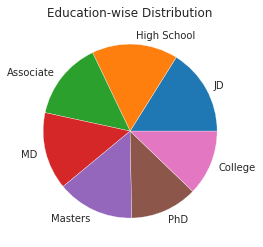

In [ ]:
edu = ['JD','High School','Associate','MD','Masters','PhD','College']
plt.pie(education,labels= edu)
plt.title('Education-wise Distribution')
plt.show()

In [ ]:
occupation = data['insured_occupation'].value_counts()
print(occupation)

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


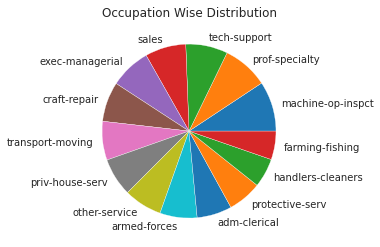

In [ ]:
occu = ['machine-op-inspct','prof-specialty','tech-support','sales','exec-managerial','craft-repair','transport-moving','priv-house-serv','other-service','armed-forces','adm-clerical','protective-serv','handlers-cleaners','farming-fishing']
plt.pie(occupation,labels=occu)
plt.title('Occupation Wise Distribution')
plt.show()

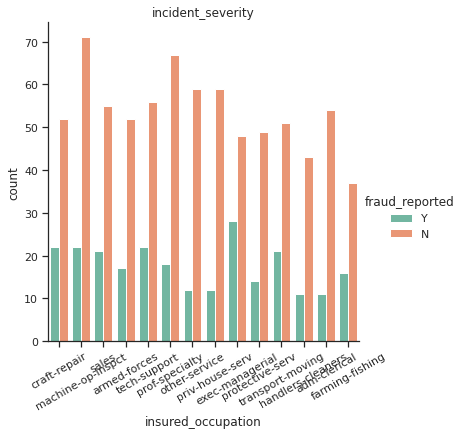

In [72]:
occupation = sns.catplot(x='insured_occupation',kind="count",hue= 'fraud_reported',palette = sns.color_palette("Set2", 2), data=data)
occupation.set_xticklabels(rotation=30)
plt.title('incident_severity')
plt.show()

In [ ]:
data.query('fraud_reported == "Y"')['insured_occupation'].value_counts()

exec-managerial      28
craft-repair         22
machine-op-inspct    22
tech-support         22
transport-moving     21
sales                21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
other-service        12
priv-house-serv      12
handlers-cleaners    11
adm-clerical         11
Name: insured_occupation, dtype: int64

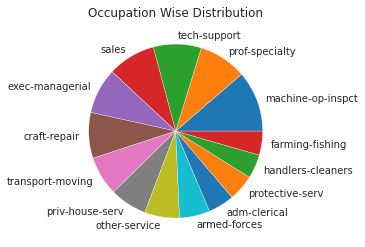

In [ ]:
occupation = data.query('fraud_reported == "Y"')['insured_occupation'].value_counts()
occu = ['machine-op-inspct','prof-specialty','tech-support','sales','exec-managerial','craft-repair','transport-moving','priv-house-serv','other-service','armed-forces','adm-clerical','protective-serv','handlers-cleaners','farming-fishing']
plt.pie(occupation,labels=occu)
plt.title('Occupation Wise Distribution')
plt.show()

In [ ]:
incidence = data['incident_type'].value_counts()
print(incidence)

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


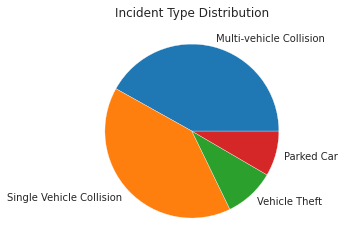

In [ ]:
incidents = ['Multi-vehicle Collision','Single Vehicle Collision','Vehicle Theft', 'Parked Car']
plt.pie(incidence,labels=incidents)
plt.title('Incident Type Distribution')
plt.show()

In [ ]:
FNF = data['fraud_reported'].value_counts()
print(FNF)

N    753
Y    247
Name: fraud_reported, dtype: int64


In [ ]:
ratio  =  FNF/len(data.index)
ratio*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
data.query('fraud_reported == "Y"')['total_claim_amount']

0      71610
1       5070
3      63400
5      64100
14     46200
       ...  
974    98280
977    53280
982    51900
986    77000
987    60320
Name: total_claim_amount, Length: 247, dtype: int64

In [ ]:
data.query('fraud_reported == "Y"')['total_claim_amount'].sort_values()

635      2860
365      3600
964      3900
552      4620
538      4700
        ...  
247     98670
145     99320
479    104610
163    107900
149    112320
Name: total_claim_amount, Length: 247, dtype: int64

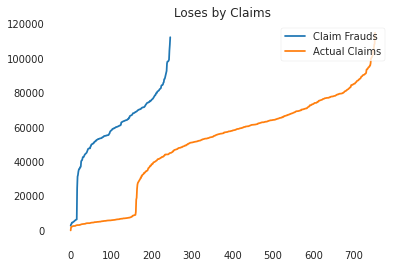

In [ ]:
y = data.query('fraud_reported == "Y"')['total_claim_amount'].sort_values()
x = [*range(0, len(y), 1)]
y2 = data.query('fraud_reported == "N"')['total_claim_amount'].sort_values()
x2 = [*range(0, len(y2), 1)]

fig, ax = plt.subplots()

ax.plot(x, y, label="Claim Frauds")
ax.plot(x2, y2, label="Actual Claims")
plt.legend(loc="upper right")
plt.title('Loses by Claims')
plt.show()

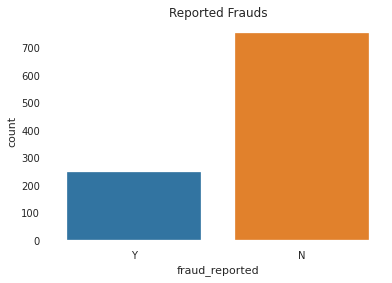

In [ ]:
sns.countplot(x='fraud_reported', data=data)
plt.title('Reported Frauds')
plt.show()

Finding the columns with uncommon values
(distinct values)

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
from datetime import datetime
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date']=pd.to_datetime(data['incident_date'])

Reducing the policy bind date ( issued date ) and incident date to month and year.


In [ ]:
data['policy_Month']=data['policy_bind_date'].dt.month
data['policy_Year']=data['policy_bind_date'].dt.year
data['Inc_Month']=data['incident_date'].dt.month
data['Inc_Year']=data['incident_date'].dt.year

CSL (Combined single limit) is a auto insurance coverage is a combination of all the liability limits


```
eg: 100/300/100
> $100000 Body Injury per person

> $300000 Per Accident 

> $100000 For property Damage
```



In [ ]:
data['csl_per_person'] = data.policy_csl.str.split('/', expand=True)[0]
data['csl_per_accident'] = data.policy_csl.str.split('/', expand=True)[1]

In [ ]:
data.select_dtypes('object').columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported', 'csl_per_person',
       'csl_per_accident'],
      dtype='object')

In [ ]:
Cat = ['insured_sex', 'insured_education_level', 'policy_state', 'insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported']

In [ ]:
for col in Cat:
    data[col] = data[col].astype('category')

In [ ]:
data.select_dtypes('category').columns

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [ ]:
for col in data.select_dtypes('category').columns:
   print(f'Column {col}: \n {data[col].unique().categories.values}\n')

Column policy_state: 
 ['OH' 'IN' 'IL']

Column insured_sex: 
 ['MALE' 'FEMALE']

Column insured_education_level: 
 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

Column insured_occupation: 
 ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

Column insured_hobbies: 
 ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

Column insured_relationship: 
 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

Column incident_type: 
 ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

Column collision_type: 
 ['Side Collision' 'Rear Collision' 'Front Collision']


In [ ]:
data.insured_sex = data.insured_sex.map({'MALE':1,'FEMALE':0})

In [ ]:
data.insured_education_level = data.insured_education_level.map({'High School': 1, 'College': 2, 'Associate': 2, 'JD': 3,'Masters': 4, 'MD': 5, 'PhD': 6})

In [ ]:
data.incident_severity = data.incident_severity.map({'Minor Damage': 1, 'Major Damage': 2, 'Total Loss': 3, 'Trivial Damage': 4})

In [ ]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y':1, 'N':0})

In [ ]:
data.select_dtypes('category').columns

Index(['policy_state', 'insured_sex', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model'],
      dtype='object')

Some variables such as 'policy_bind_date', 'incident_date', 'incident_location' and 'insured_zip' contain very high number of level.

In [ ]:
data.drop(['policy_bind_date','incident_date','incident_location','policy_number','policy_csl'],axis=1,inplace=True)

In [ ]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_Month,policy_Year,Inc_Month,Inc_Year,csl_per_person,csl_per_accident
0,328,48,OH,1000,1406.91,0,466132,1,5,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,2,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1,10,2014,1,2015,250,500
1,228,42,IN,2000,1197.22,5000000,468176,1,5,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,1,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,1,6,2006,1,2015,250,500
2,134,29,OH,2000,1413.14,5000000,430632,0,6,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,1,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,9,2000,2,2015,100,300
3,256,41,IL,2000,1415.74,6000000,608117,0,6,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,2,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,5,1990,1,2015,250,500
4,228,44,IL,1000,1583.91,6000000,610706,1,2,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,1,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0,6,2014,2,2015,500,1000


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in data.select_dtypes('category').columns:
  data[col]= label_encoder.fit_transform(data[col])
  data[col].unique()

In [ ]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_Month,policy_Year,Inc_Month,Inc_Year,csl_per_person,csl_per_accident
0,328,48,2,1000,1406.91,0,466132,1,5,2,17,0,53300,0,2,2,1,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,10,2014,1,2015,250,500
1,228,42,1,2000,1197.22,5000000,468176,1,5,6,15,2,0,0,3,1,0,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,6,2006,1,2015,250,500
2,134,29,2,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,0,1,0,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,9,2000,2,2015,100,300
3,256,41,0,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,2,0,1,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,5,1990,1,2015,250,500
4,228,44,0,1000,1583.91,6000000,610706,1,2,11,2,4,66000,-46000,3,1,0,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,6,2014,2,2015,500,1000


In [ ]:
for col in (data.select_dtypes('object').columns):
    data[col] = data[col].astype('int64')

<font color= #1a75ff><h3>Model building</h3></font>


In [ ]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', 'policy_Month', 'policy_Year',
       'Inc_Month', 'Inc_Year', 'csl_per_person', 'csl_per_accident'],
      dtype='object')

In [ ]:
Col_Final = ['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'policy_Month', 'policy_Year',
       'Inc_Month', 'Inc_Year', 'csl_per_person', 'csl_per_accident']

In [ ]:
len(Col_Final)

38

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop(['insured_zip'],axis=1)

In [ ]:
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_Month,policy_Year,Inc_Month,Inc_Year,csl_per_person,csl_per_accident
0,328,48,2,1000,1406.91,0,1,5,2,17,0,53300,0,2,2,1,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,10,2014,1,2015,250,500
1,228,42,1,2000,1197.22,5000000,1,5,6,15,2,0,0,3,1,0,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,6,2006,1,2015,250,500
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,0,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,9,2000,2,2015,100,300
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,1,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,5,1990,1,2015,250,500
4,228,44,0,1000,1583.91,6000000,1,2,11,2,4,66000,-46000,3,1,0,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,6,2014,2,2015,500,1000


In [ ]:
y = data['fraud_reported'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

800
800
200
200


<font color= #1a75ff><h4>K Nearest Neighbours</h4></font>

In [ ]:
knn = KNeighborsClassifier(2)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
knn_predict =knn.predict(x_test)

<font color=darkblue><h5> Confusion matrix </h5></font>

In [ ]:
confusion_matrix(knn_predict, y_test)

array([[131,  49],
       [ 12,   8]])

<font color=darkblue><h5>Precision Score = TP / (TP + FP) </h5></font>

In [ ]:
precision_score(knn_predict, y_test)

0.14035087719298245

<font color=darkblue><h5>Recall Score = TP / (TP + FN) </h5></font>



In [ ]:
recall_score(knn_predict, y_test)

0.4

<font color=darkblue><h5>Accuracy </h5></font>

In [ ]:
accuracy_score(knn_predict,y_test)

0.695

<font color= #1a75ff><h4>Decision Tree</h4></font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3,criterion='entropy')

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree_predict = dtree.predict(x_test)

<font color=darkblue><h5> Confusion matrix </h5></font>

In [ ]:
confusion_matrix(dtree_predict, y_test)

array([[143,   0],
       [  0,  57]])

<font color=darkblue><h5>Precision Score = TP / (TP + FP) </h5></font>

In [ ]:
precision_score(dtree_predict, y_test)

1.0

<font color=darkblue><h5>Recall Score = TP / (TP + FN) </h5></font>

In [ ]:
recall_score(dtree_predict, y_test)

1.0

<font color=darkblue><h5>Accuracy </h5></font>

In [ ]:
accuracy_score(dtree_predict,y_test)

1.0

In [ ]:
from sklearn import tree

In [ ]:
Col_Final.remove('insured_zip')

In [ ]:
dot_data = tree.export_graphviz(dtree,  out_file=None)

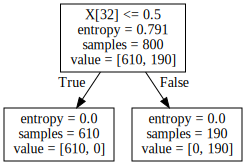

In [ ]:
graph = graphviz.Source(dot_data)
graph

<font color= #1a75ff><h3>Random Forest</h3></font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfClass = RandomForestClassifier()

In [ ]:
rfClass.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfClass_predict = rfClass.predict(x_test)

<font color=darkblue><h5> Confusion matrix </h5></font>

In [ ]:
confusion_matrix(rfClass_predict,y_test)

array([[143,   0],
       [  0,  57]])

<font color=darkblue><h5>Precision Score = TP / (TP + FP) </h5></font>

In [ ]:
precision_score(dtree_predict, y_test)

1.0

<font color=darkblue><h5>Recall Score = TP / (TP + FN) </h5></font>

In [ ]:
recall_score(dtree_predict, y_test)

1.0

<font color=darkblue><h5>Accuracy </h5></font>

In [ ]:
accuracy_score(dtree_predict, y_test)

1.0

<font color= #1a75ff><h3>Comparing Models</h3></font>

In [ ]:
models=[]
models.append(("KNN",KNeighborsClassifier())) 
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))

KNN
Average is
0.7249999999999999
RF
Average is
1.0
DT
Average is
1.0


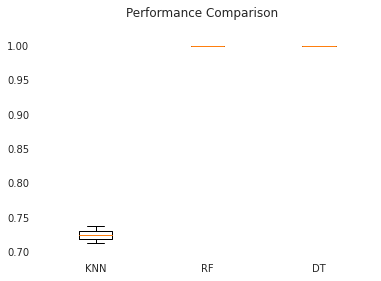

In [ ]:
results=[]
names=[]
for name,model in models:
	v=cross_val_score(model,x_train,y_train)
	results.append(v)
	names.append(name)
	print(name)
	#print(v)
	print("Average is")
	print(sum(v)/len(v))
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("Performance Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
